In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
import plotting_functions as plot

In [18]:
train = pd.read_csv('train.csv')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The columns that are objects are categorical variables and the following functions turn them into categorical variabled. The MSSubClass variable is an int64 when it should be categorical so that is changed as well.

In [20]:
train['MSSubClass'] = train['MSSubClass'].astype('category')
train['OverallQual'] = train['OverallQual'].astype('category')
train['OverallQual'] = train['OverallQual'].astype('category')
train['OverallQual'] = train['OverallQual'].astype('category')
train['YearRemodAdd'] = train['YearRemodAdd'].astype('category')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('category')
train['MoSold'] = train['MoSold'].astype('category')
train['YrSold'] = train['YrSold'].astype('category')

In [21]:
objects = train.select_dtypes(include='object')
cols = objects.columns
for i in cols:
    train[i] = train[i].astype('category')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-nu

# Sale Price Exploratory Analysis

In [23]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

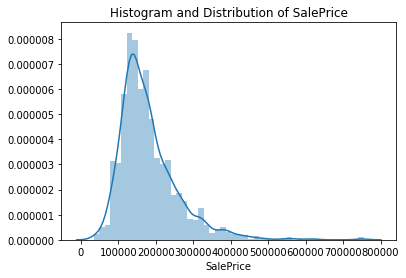

In [24]:
plot.histogram(train, 'SalePrice')

The median sales price for houses in Iowa is 163,000 and the mean is ~181,000. The histogram shows that the histogram is right skewed meaning that the mean is greater than the median. This could mean that the log transform might be a better option when predicting.

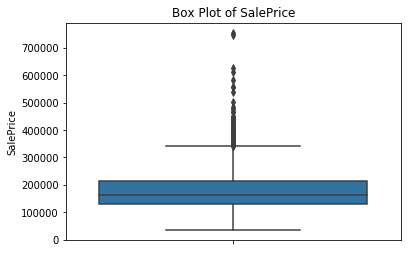

In [25]:
plot.boxplot(train, 'SalePrice')

When looking at the boxplot of the sales price, you can see that there are some very large values (> 500,000) that is causing the price to be skewed.

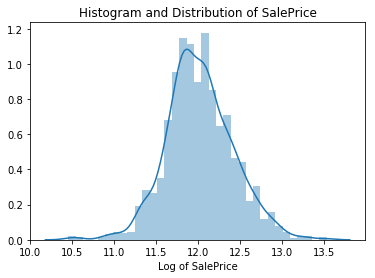

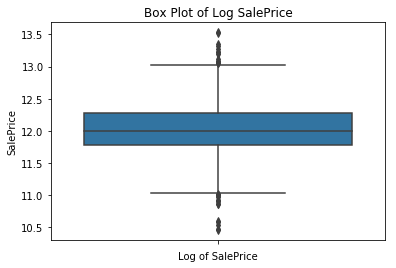

In [26]:
plot.histogram(train, 'SalePrice', True)
plot.boxplot(train, 'SalePrice', True)

When you take the log transform of the sales price, the data becomes a little more normal looking. The skew is almost gone from the histogram and boxplot. There also don't seem to be as many outliers in the data after the tranform.

# Numerical Variables

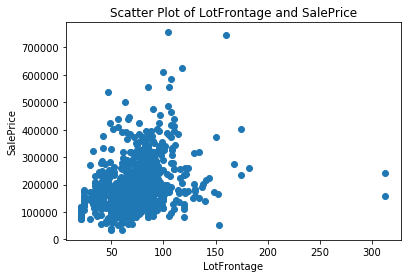

In [27]:
plot.scatterplot(train,'LotFrontage','SalePrice',False)

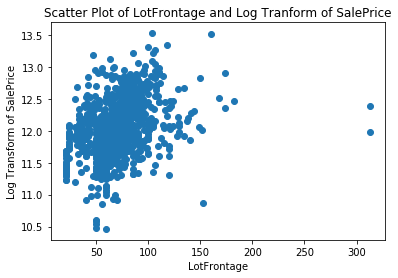

In [28]:
plot.scatterplot(train,'LotFrontage','SalePrice',True)

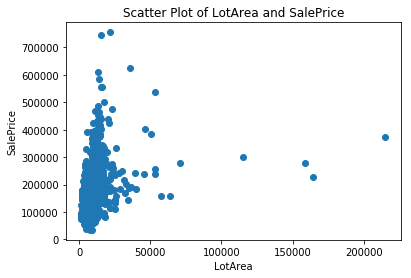

In [29]:
plot.scatterplot(train,'LotArea','SalePrice',False)

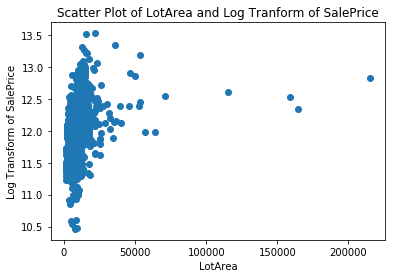

In [30]:
plot.scatterplot(train,'LotArea','SalePrice',True)